In [1]:
import cv2

import os
from glob import glob

import tensorflow as tf
from PIL import Image

import numpy as np
from matplotlib import pyplot as plt
cv2.__version__

'4.5.3'

In [2]:
os.getcwd()

'C:\\Users\\hyunj\\OneDrive\\바탕 화면\\Codings\\0.실습\\콘크리트이미지'

In [3]:
data_paths = glob('../../../scope/211013/86/24/*.png')
data_paths

['../../../scope/211013/86/24\\0001.png',
 '../../../scope/211013/86/24\\0002.png',
 '../../../scope/211013/86/24\\0003.png',
 '../../../scope/211013/86/24\\0004.png',
 '../../../scope/211013/86/24\\0005.png',
 '../../../scope/211013/86/24\\0006.png',
 '../../../scope/211013/86/24\\0007.png',
 '../../../scope/211013/86/24\\0008.png',
 '../../../scope/211013/86/24\\0009.png',
 '../../../scope/211013/86/24\\0010.png']

In [4]:
path = data_paths[0]
path

'../../../scope/211013/86/24\\0001.png'

In [5]:
len(data_paths)

10

In [6]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [7]:
image.shape

TensorShape([3000, 4000, 3])

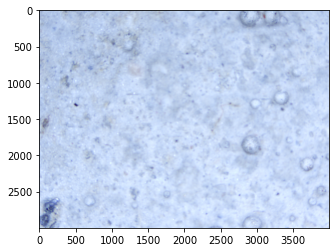

In [8]:
plt.imshow(image[:,:,:])
plt.show()

In [9]:
image_pil = Image.open(path).convert('L')
image = np.array(image_pil)

In [10]:
image.shape

(3000, 4000)

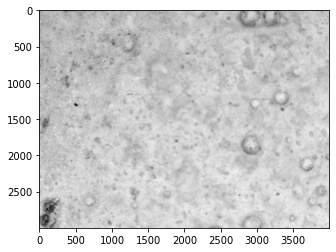

In [11]:
plt.imshow(image,'gray')
plt.show()

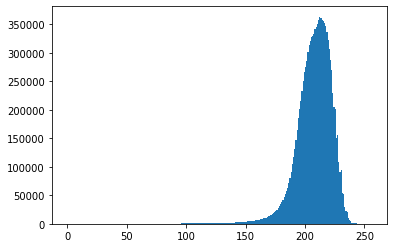

In [12]:
import cv2

plt.hist(image.ravel(), 256, [0,256])
plt.show()

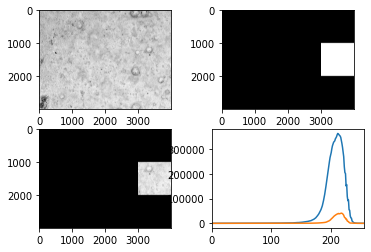

In [13]:
# 원하는 영역만 히스토그램
mask = np.zeros(image.shape[:2], np.uint8)
mask[1000:2000, 3000:4000] = 255
masked_img = cv2.bitwise_and(image, image, mask=mask)

hist_full = cv2.calcHist([image], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([image], [0], mask, [256], [0,256])

plt.subplot(221), plt.imshow(image, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

(<AxesSubplot:title={'center':'Histogram'}>,
 Text(0.5, 1.0, 'Histogram'))

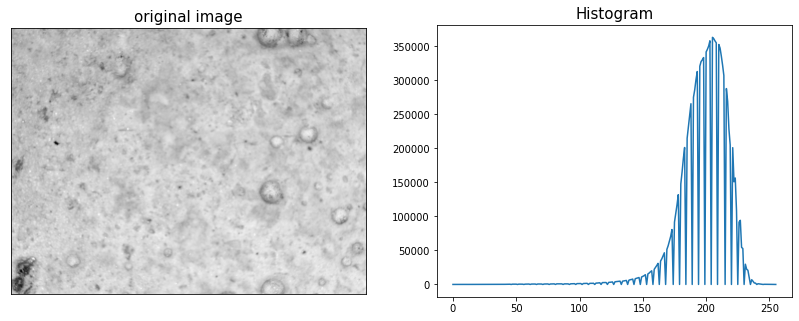

In [14]:
hist, bin_edges = np.histogram(image, bins=256)

plt.figure(figsize=(14,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.plot(hist),plt.title('Histogram',fontsize=15)

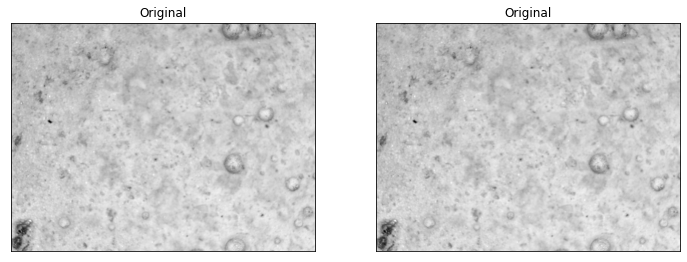

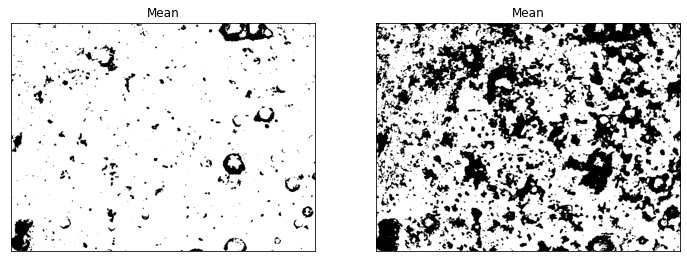

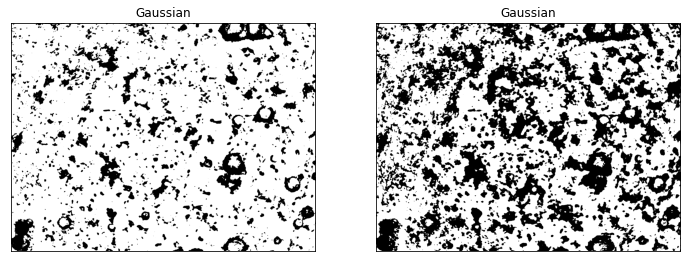

In [15]:
th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 2001, 20)
th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 2001, 10)

th3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 2001, 2)
th4 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 2001, 2)

titles = ['Original',"Mean", 'Gaussian']

images1 = [image, th1, th2]
images2 = [image, th3, th4]

for i in range(3):
    plt.figure(figsize=(12,15))
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(images1[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(images2[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
    
plt.show()